In [23]:
#Load in the dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [25]:
x_train = x_train / 255
x_test = x_test / 255

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [27]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [33]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 15s 442us/step - loss: 1.6618 - accuracy: 0.3997 - val_loss: 1.4224 - val_accuracy: 0.4868
Epoch 2/10
35000/35000 [==============================] - 16s 448us/step - loss: 1.2967 - accuracy: 0.5378 - val_loss: 1.2363 - val_accuracy: 0.5634
Epoch 3/10
35000/35000 [==============================] - 15s 440us/step - loss: 1.1369 - accuracy: 0.5974 - val_loss: 1.1418 - val_accuracy: 0.5959
Epoch 4/10
35000/35000 [==============================] - 15s 439us/step - loss: 1.0215 - accuracy: 0.6434 - val_loss: 1.0979 - val_accuracy: 0.6135
Epoch 5/10
35000/35000 [==============================] - 15s 439us/step - loss: 0.9349 - accuracy: 0.6698 - val_loss: 1.0346 - val_accuracy: 0.6400
Epoch 6/10
35000/35000 [==============================] - 16s 448us/step - loss: 0.8482 - accuracy: 0.7029 - val_loss: 1.0136 - val_accuracy: 0.6496
Epoch 7/10
35000/35000 [==============================] 

In [35]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 2s 168us/step


0.683899998664856

In [ ]:
#Visualize the accuracy
import matplotlib.pyplot as plt

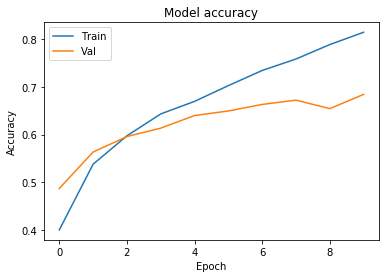

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

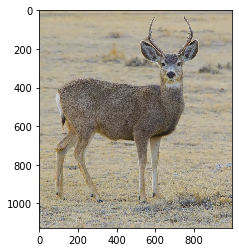

In [38]:
#import libraries to process image and obtain hardware specs
from skimage.transform import resize
import numpy as np
import time
import cpuinfo
my_image = plt.imread("deer.jpg")
img = plt.imshow(my_image)

In [39]:
#main code gives classification specifics
info = cpuinfo.get_cpu_info()['brand']
speed = cpuinfo.get_cpu_info()['hz_actual']
print(info, speed, "")
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'Deer', 'dog', 'frog', 'horse', 'ship', 'truck']
start = time.time()
my_image_resized = resize(my_image, (32,32,3))  
probabilities = model.predict(np.array( [my_image_resized,] ))
index = np.argsort(probabilities[0,:])
print("Identified class:", number_to_class[index[9]])
print("Probability:", probabilities[0,index[9]])
total = time.time() - start
print("classification rate: %s images per second" % (1/total))

AMD Ryzen 7 3800X 8-Core Processor 3.8930 GHz 
Identified class: Deer
Probability: 0.75352556
classification rate: 3.0113733207641182 images per second
